In [5]:
import numpy as np
import cv2 as cv 
from skimage import io
from google.colab.patches import cv2_imshow #for image display
from PIL import Image
from matplotlib import pyplot as plt

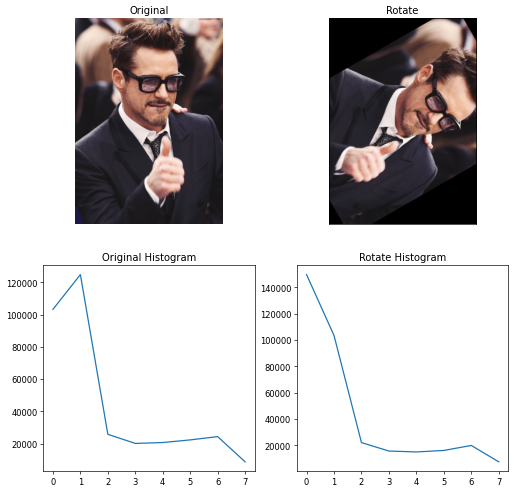

In [39]:
image = cv.imread('/content/kkk.jpg')

image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

height, width = image.shape[:2]

center = (width/2, height/2)

rotate_matrix = cv.getRotationMatrix2D(center=center, angle=-60, scale=1)

rotated_image = cv.warpAffine(src=image, M=rotate_matrix, dsize=(width, height))

#cv2_imshow(image)
#cv2_imshow(rotated_image)

# Saving the rotated image 
cv.imwrite('rotated_image.jpg', rotated_image)


#Original Histogram
histr_original = cv.calcHist([image],[1],None,[8],[0,256])

#Histogram on Rotation
histr_rotate = cv.calcHist([rotated_image],[1],None,[8],[0,256])

plt.figure(figsize=(10, 10),dpi=60)

plt.subplot(2,2,1)
plt.axis("off")
plt.title('Original')
plt.imshow(image)

plt.subplot(2,2, 2)
plt.title('Rotate'),plt.xticks([]), plt.yticks([])
plt.imshow(rotated_image)

plt.subplot(2,2, 3)
plt.title('Original Histogram')
plt.plot(histr_original)

plt.subplot(2,2,4)
plt.title('Rotate Histogram')
plt.plot(histr_rotate)

plt.show()




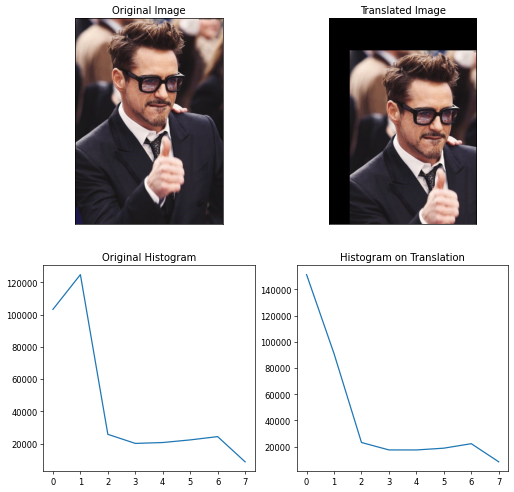

In [40]:
# Apply the Translation

num_rows, num_cols = image.shape[:2]

translation_matrix = np.float32([ [1,0,70], [0,1,110] ])
img_translation = cv.warpAffine(image, translation_matrix, (num_cols, num_rows))

#cv2_imshow(img_translation)
cv.imwrite('translated_image.jpg', img_translation)

# Now Plot Histogram

#Histogram of Translation
histr_translate = cv.calcHist([img_translation],[1],None,[8],[0,256])

plt.figure(figsize=(10, 10),dpi=60)

plt.subplot(2,2,1)
plt.imshow(image)
plt.title('Original Image'),plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(img_translation)
plt.title('Translated Image'),plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3)
plt.plot(histr_original)
plt.title('Original Histogram')

plt.subplot(2,2,4)
plt.plot(histr_translate)
plt.title('Histogram on Translation')

plt.show()


(3500, 2500, 3)
(700, 500, 3)


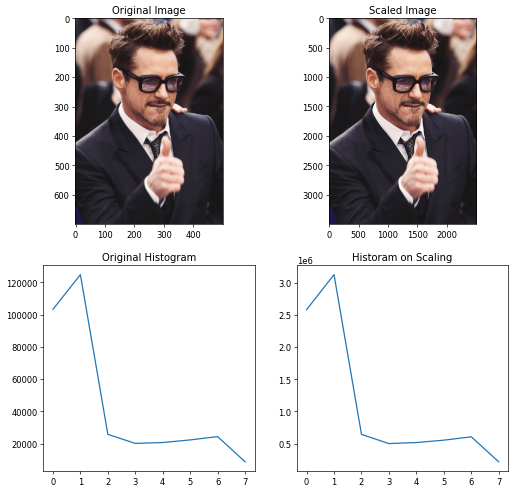

In [41]:
#Apply the Scaling

res = cv.resize(image,None,fx=5, fy=5, interpolation = cv.INTER_CUBIC)
print(res.shape)
print(image.shape)


# Now Plot Histogram

#Historam of Scaling
histr_scale = cv.calcHist([res],[1],None,[8],[0,256])

plt.figure(figsize=(10, 10),dpi=60)


plt.subplot(2,2,1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(res)
plt.title('Scaled Image')


plt.subplot(2,2,3)
plt.plot(histr_original)
plt.title('Original Histogram')

plt.subplot(2,2,4)
plt.plot(histr_scale)
plt.title('Historam on Scaling')


plt.show()





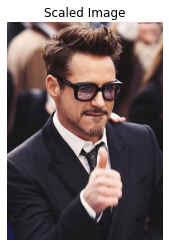

In [68]:
plt.imshow(res)
plt.axis('off')
plt.title('Scaled Image')
plt.show()

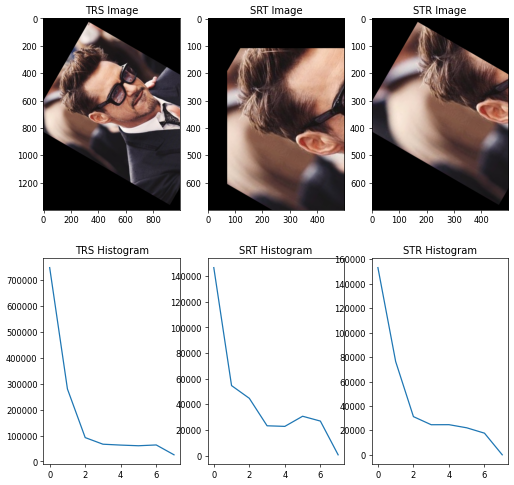

In [66]:
#Matrix Composition
#Lets try Transformation of Translation-Rotation-Scaling 
rotate_matrix = cv.getRotationMatrix2D(center=center, angle=60, scale=1)
#Translation
img_translation = cv.warpAffine(image, translation_matrix, (num_cols, num_rows))

#Rotaion
rotated_image = cv.warpAffine(src=img_translation, M=rotate_matrix, dsize=(width, height))

#Scaling
img_TRS = cv.resize(rotated_image,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)


#Histogram of TRS
histr_TRS = cv.calcHist([img_TRS],[1],None,[8],[0,256])
plt.figure(figsize=(10, 10),dpi=60)
plt.subplot(2,3,1)
plt.imshow(img_TRS)
plt.title('TRS Image')
plt.subplot(2,3,4)
plt.plot(histr_TRS)
plt.title('TRS Histogram')
#Lets try Transformation Scaling-Rotation-Translation

#Scaling
img = cv.resize(image,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)

#Rotaion
rotated_image = cv.warpAffine(src=img, M=rotate_matrix, dsize=(width, height))

#Translation
img_translation_SRT = cv.warpAffine(rotated_image, translation_matrix, (num_cols, num_rows))

#Histogram of SRT
histr_SRT = cv.calcHist([img_translation_SRT],[1],None,[8],[0,256])

plt.subplot(2,3,2)
plt.imshow(img_translation_SRT)
plt.title('SRT Image')
plt.subplot(2,3,5)
plt.plot(histr_SRT)
plt.title('SRT Histogram')

#Lets try Transformation Scaling-Translation-Rotation

#Scaling
img = cv.resize(image,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)

#Translation
img_translation_STR = cv.warpAffine(img, translation_matrix, (num_cols, num_rows))

#Rotaion
rotated_image = cv.warpAffine(src=img_translation_STR, M=rotate_matrix, dsize=(width, height))

#Histogram of STR
histr_STR = cv.calcHist([img_translation_RST],[1],None,[8],[0,256])

plt.subplot(2,3,3)
plt.imshow(rotated_image)
plt.title('STR Image')
plt.subplot(2,3,6)
plt.plot(histr_STR)
plt.title('STR Histogram')
plt.show()
